## I Classification binaire
### 1 Dataset

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.datasets import make_circles,make_blobs
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

Dimensions de l'entrée (X) : (1000, 2)
Dimensions de la sortie (y) : (1000,)


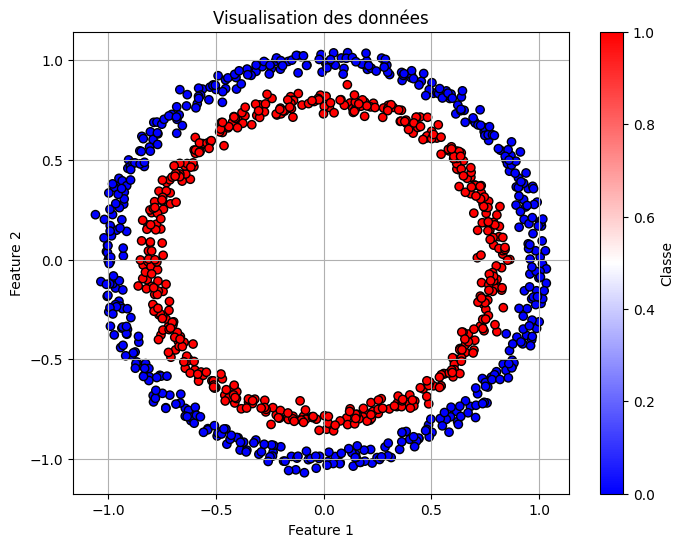

In [2]:
# a. Créer des données avec make circles()
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
# b. Afficher les dimensions du dataset
print("Dimensions de l'entrée (X) :", X.shape)
print("Dimensions de la sortie (y) :", y.shape)
# c. Visualiser les données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des données')
plt.colorbar(label='Classe')
plt.grid(True)
plt.show()
#d
#Non car elle est complexe , une droite ne peut pas séparer les deux classes

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dimensions de l'ensemble d'apprentissage (X_train) :", X_train.shape)
print("Dimensions de l'ensemble de test (X_test) :", X_test.shape)
print("Dimensions de l'ensemble d'apprentissage (y_train) :", y_train.shape)
print("Dimensions de l'ensemble de test (y_test) :", y_test.shape)

Dimensions de l'ensemble d'apprentissage (X_train) : (800, 2)
Dimensions de l'ensemble de test (X_test) : (200, 2)
Dimensions de l'ensemble d'apprentissage (y_train) : (800,)
Dimensions de l'ensemble de test (y_test) : (200,)


### 2. Définition du modèle


In [38]:
# create a custom callback that prints the training metrics every 10 epochs
class DisplayProgressAfterTenEpochs(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 10 == 0:
            print(f"\nEpoch {epoch + 1}:")
            print(f"  Training accuracy: {logs['accuracy']:.4f}")
            print(f"  Training loss: {logs['loss']:.4f}")
            print(f"  Validation accuracy: {logs['val_accuracy']:.4f}")
            print(f"  Validation loss: {logs['val_loss']:.4f}\n")

In [41]:
def train_model(layer,epoch):
    input_shape=[2]
    # YOUR CODE HERE
    model = keras.Sequential([
        layers.Dense(units=layer,activation='relu',input_shape=input_shape),
        layers.Dense(units=1,activation='sigmoid'),
    ])
    model.summary()

    # Compiler le modèle
    model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])
    # Entraîner le modèle
    history = model.fit(X_train, y_train, epochs=epoch, batch_size=32, validation_data=(X_test, y_test),verbose=0,callbacks=[DisplayProgressAfterTenEpochs()])
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot()
    history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
    return model

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                150       
                                                                 
 dense_21 (Dense)            (None, 1)                 51        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 10:
  Training accuracy: 0.5213
  Training loss: 0.6834
  Validation accuracy: 0.4950
  Validation loss: 0.6903


Epoch 20:
  Training accuracy: 0.5325
  Training loss: 0.6801
  Validation accuracy: 0.4900
  Validation loss: 0.6869


Epoch 30:
  Training accuracy: 0.5825
  Training loss: 0.6771
  Validation accuracy: 0.5350
  Validation loss: 0.6838


Epoch 40:
  Training accuracy: 0.6288
  Training lo

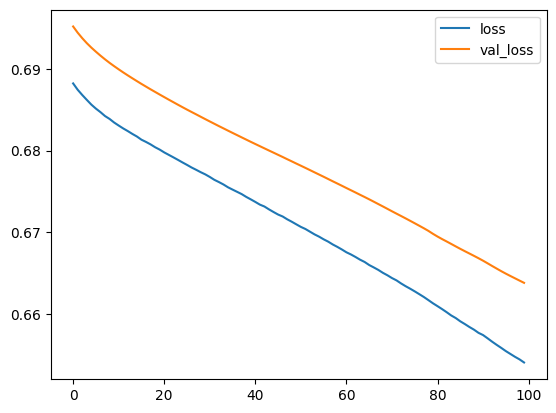

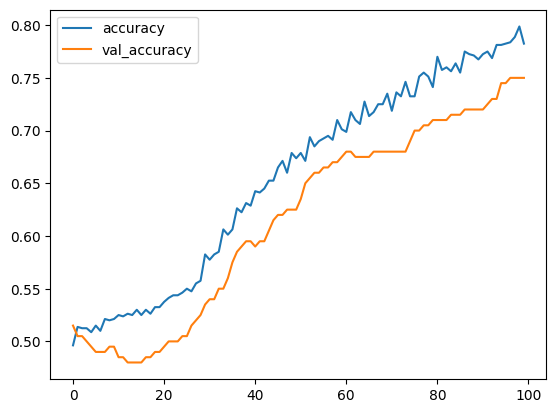

In [42]:
model=train_model(50,100)

In [44]:
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.round(Z).astype(int)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(label='Classe')

417/417 [==============================] - 1s 1ms/step


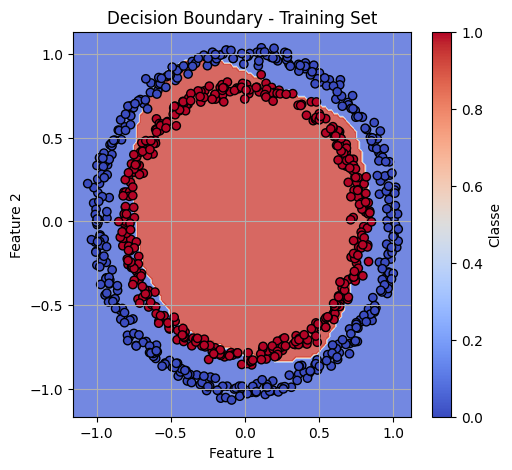

In [45]:
# Tracer la frontière de décision pour l'ensemble d'entraînement
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, model, "Decision Boundary - Training Set")
plt.grid(True)


## II. La multi-Classification :

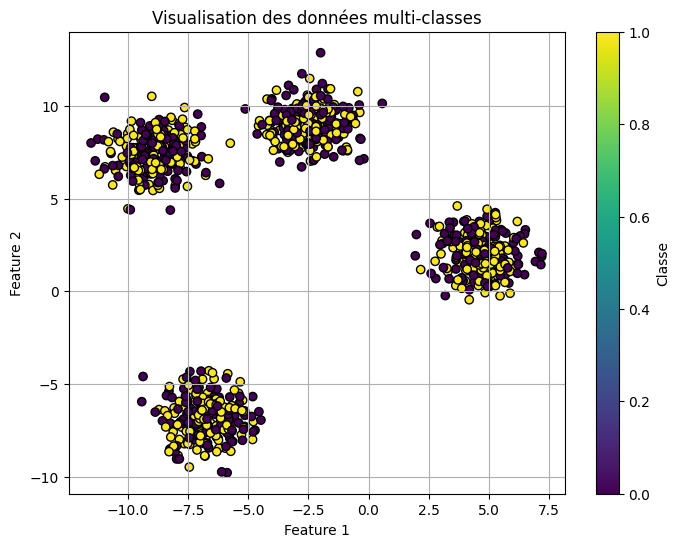

In [46]:
# 1. Créer des données multi-classes avec make_blobs()
X1, y1 = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)
# 2. Diviser les données en ensembles d’apprentissage et de test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
# 3. Visualiser les données
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des données multi-classes')
plt.colorbar(label='Classe')
plt.grid(True)
plt.show()
# 4. Ce dataset nécessite une fonction linéaire ou non linéaire pour séparer ses classes ?
# Justification : Ce dataset nécessite probablement une fonction non linéaire pour séparer ses classes, car les classes peuvent être réparties de manière non linéaire dans l'espace des caractéristiques.


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               300       
                                                                 
 dense_26 (Dense)            (None, 50)                5050      
                                                                 
 dense_27 (Dense)            (None, 4)                 204       
                                                                 
Total params: 5554 (21.70 KB)
Trainable params: 5554 (21.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 10:
  Training accuracy: 0.9987
  Training loss: 0.0272
  Validation accuracy: 1.0000
  Validation loss: 0.0233


Epoch 20:
  Training accuracy: 0.9987
  Training loss: 0.0133
  Validation accuracy: 1.0000
  Validation loss: 0.0109


Epoch 30:
  Training accuracy: 0.9987
  Tr

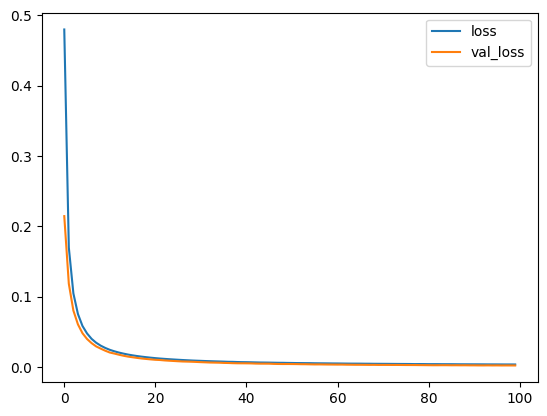

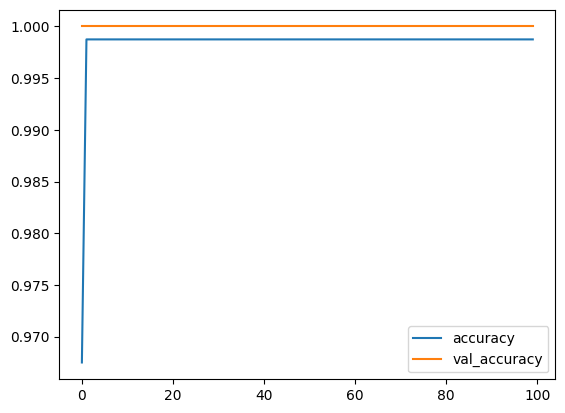

In [48]:

# 5. Proposer une architecture basée sur FCNN pour la classification de ces données et la développer.
model1 = keras.Sequential([
                layers.Dense(100, activation='relu',input_shape=[2]),
                layers.Dense(50, activation='relu'),
                layers.Dense(4, activation='softmax'),])
model1.summary()

# Compiler le modèle
model1.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
# Entraîner le modèle sur 100 époques
history = model1.fit(X_train_1, y_train_1, epochs=100, batch_size=32, validation_data=(X_test_1, y_test_1),verbose=0,callbacks=[DisplayProgressAfterTenEpochs()])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();



7/7 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Text(0.5, 1.0, 'Confusion Matrix')

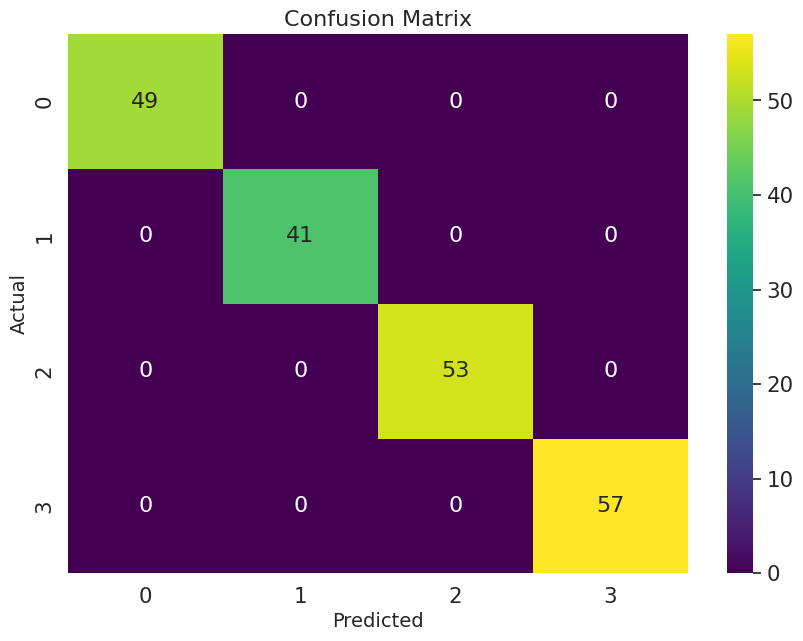

In [52]:
# 7. Afficher toutes les métriques de classification et expliquer l’utilité de chacune d’elles
y_pred = np.argmax(model1.predict(X_test_1), axis=-1)
print("Classification Report:")
print(classification_report(y_test_1, y_pred))


cm=confusion_matrix(y_test_1, y_pred)
# Create a heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # Set the font scale for the heatmap
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='viridis', fmt='g')  # Create the heatmap

# Add labels and a title
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)


30359/30359 [==============================] - 41s 1ms/step


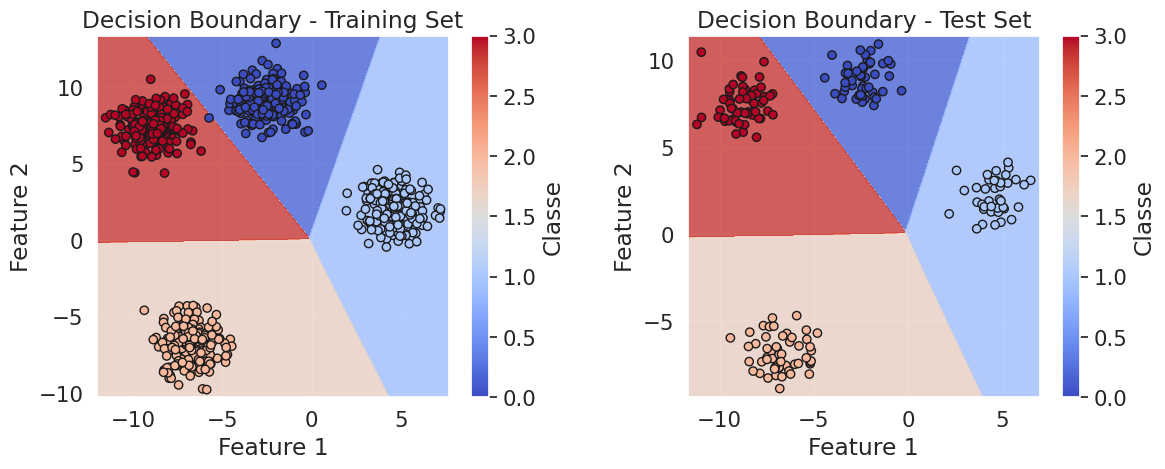

In [53]:
# 8. Tracer la (les) frontières(s) de décision pour les ensembles d’entrainement et de test
def plot_decision_boundary_1(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(label='Classe')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary_1(X_train_1, y_train_1, model1, "Decision Boundary - Training Set")
plt.grid(True)

plt.subplot(1, 2, 2)
plot_decision_boundary_1(X_test_1, y_test_1, model1, "Decision Boundary - Test Set")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 9. Etudier l’impact de l’augmentation du nombre d’échantillons dans le dataset sur l’exactitude de classification
# et afficher la courbe de la progression de l’exactitude de classification en fonction du nombre d’échantillons dans le dataset
train_accuracies = []
test_accuracies = []
sample_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for size in tqdm(sample_sizes):
    X, y = make_blobs(n_samples=size, centers=4, n_features=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = keras.Sequential()
    model.add(keras.layers.Dense(100, input_shape=[2], activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0,validation_data=(X_test, y_test))

    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)



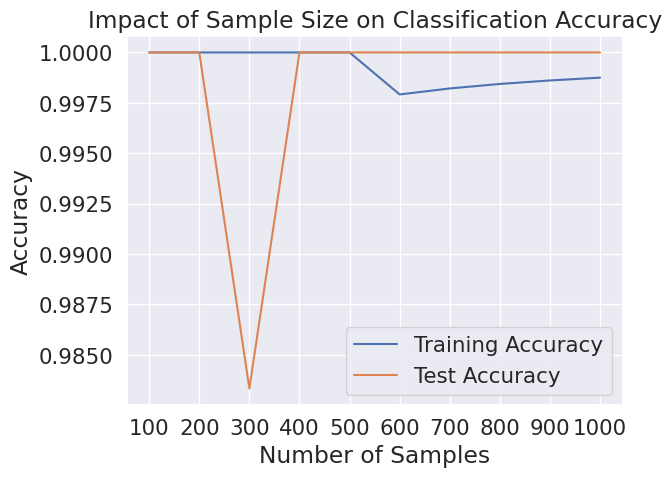

In [65]:
plt.plot(sample_sizes, train_accuracies, label='Training Accuracy')
plt.plot(sample_sizes, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.title('Impact of Sample Size on Classification Accuracy')
plt.legend()
# Set the x-axis ticks to show all points
plt.xticks(sample_sizes)
plt.grid(True)
plt.show()